In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
print(mnist.train.images.shape)
print(mnist.test.images.shape)

(55000, 784)
(10000, 784)


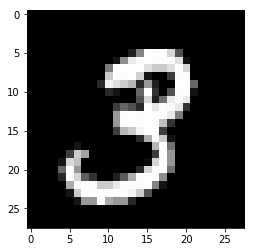

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def showImage(index):
    first_image = mnist.train.images[index]
    first_image = np.array(first_image, dtype='float')
    pixels = first_image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

showImage(1)

In [5]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

Instructions for updating:
Use tf.cast instead.


In [11]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [12]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Точность: %s" % sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

Точность: 0.9183


In [13]:
prediction = sess.run(correct_prediction, feed_dict={x: mnist.test.images, y_: mnist.test.labels})

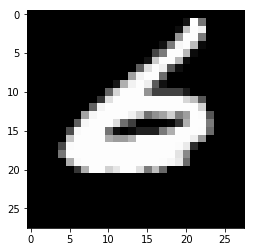

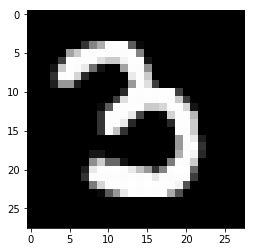

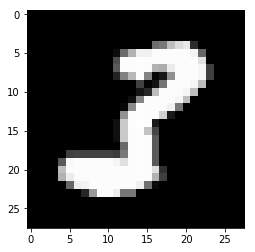

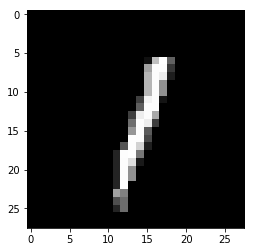

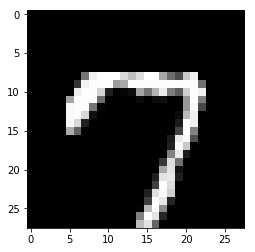

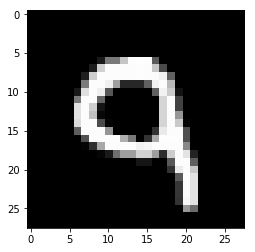

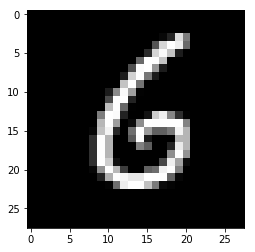

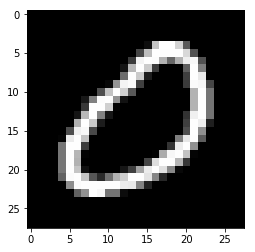

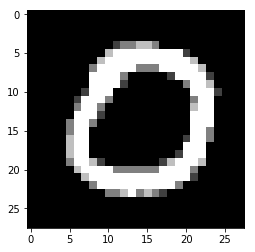

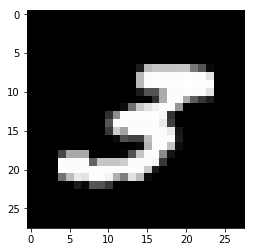

In [14]:
incorrect = np.where(prediction == False)
for i in incorrect[0][:10]:
    showImage(i)

In [15]:
W_relu = tf.Variable(tf.truncated_normal([784, 100], stddev=0.1))
b_relu = tf.Variable(tf.truncated_normal([100], stddev=0.1))
h = tf.nn.relu(tf.matmul(x, W_relu) + b_relu)
keep_probability = tf.placeholder(tf.float32)
h_drop = tf.nn.dropout(h, keep_probability)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [18]:
W = tf.Variable(tf.zeros([100, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(h_drop, W) + b)
for i in range(2000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys, keep_probability: 0.5})
print("Точность: %s" % sess.run(accuracy, feed_dict={x:mnist.test.images, y_:mnist.test.labels, keep_probability:1.}))

Точность: 0.9233


In [19]:
logit = tf.matmul(h_drop, W) + b
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logit, y_))
for i in range(10000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys, keep_probability : 0.5})
print("Точность: %s" % sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_probability : 1.}))

Точность: 0.9246
